In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from preprocessing_data import rolling_window, train_test_split_window, convert_date # type: ignore
from sklearn.model_selection import train_test_split

In [53]:
data_filtered_test = pd.read_csv("../database/venda_process/mensal/uf/glp/mensal_pr_glp.csv", sep=";",  parse_dates=['timestamp'], date_parser=convert_date)

# Generating the attribute-value table (normalized)
data_normalized, scaler = rolling_window(data_filtered_test["m3"], 12)

# Splitting the data into train/test considering a prediction horizon of 12 months
X_train, X_test, y_train, y_test = train_test_split_window(data_normalized, 12)

X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42, shuffle=False)

/tmp/ipykernel_25270/3134264583.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_filtered_test = pd.read_csv("../database/venda_process/mensal/uf/glp/mensal_pr_glp.csv", sep=";",  parse_dates=['timestamp'], date_parser=convert_date)


In [61]:
X_train.shape

(386, 12)

In [64]:
X_val.shape

(39, 12)

### Carregando dados

In [2]:
# Lista de pastas
folders = [
    "result_v4_3",
    "result_v4_6",
    "result_v4_12",
    "result_v4_24",
    "result_v4_36"
]

# DataFrame vazio para armazenar os dados combinados
direct_predict = pd.DataFrame()

# Iterar por cada pasta e ler o arquivo Excel
for folder in folders:
    file_path = os.path.join(folder, "lstm_results.xlsx")
    df = pd.read_excel(file_path)
    # Adicionar os dados ao DataFrame combinado
    direct_predict = pd.concat([direct_predict, df], ignore_index=True)

In [3]:
# Lista de pastas
folders = [
    "result_v3_3",
    "result_v3_6",
    "result_v3_12",
    "result_v3_24",
    "result_v3_36"
]

# DataFrame vazio para armazenar os dados combinados
recursive_predict = pd.DataFrame()

# Iterar por cada pasta e ler o arquivo Excel
for folder in folders:
    file_path = os.path.join(folder, "lstm_results.xlsx")
    df = pd.read_excel(file_path)
    # Adicionar os dados ao DataFrame combinado
    recursive_predict = pd.concat([direct_predict, df], ignore_index=True)

In [4]:
# Remover linhas com valores não nulos na coluna ERROR
direct_predict_cleaned = direct_predict[direct_predict['ERROR'].isna()]

# Colunas específicas para verificar
columns_to_check = ['RMSE_RESCALED', 'MAPE_RESCALED', 'PBE_RESCALED', 'POCID_RESCALED', 'MASE_RESCALED']

# Substituir 'inf' e '-inf' por 'NaN' apenas nas colunas especificadas
direct_predict_cleaned[columns_to_check] = direct_predict_cleaned[columns_to_check].replace([np.inf, -np.inf], np.nan)

# Remover linhas que contêm 'NaN' nas colunas especificadas
direct_predict_cleaned.dropna(subset=columns_to_check, inplace=True)

/tmp/ipykernel_25270/3848114719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct_predict_cleaned[columns_to_check] = direct_predict_cleaned[columns_to_check].replace([np.inf, -np.inf], np.nan)
/tmp/ipykernel_25270/3848114719.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct_predict_cleaned.dropna(subset=columns_to_check, inplace=True)


In [5]:
# Remover linhas com valores não nulos na coluna ERROR
recursive_predict_cleaned = recursive_predict[recursive_predict['ERROR'].isna()]

# Colunas específicas para verificar
columns_to_check = ['RMSE_RESCALED', 'MAPE_RESCALED', 'PBE_RESCALED', 'POCID_RESCALED', 'MASE_RESCALED']

# Substituir 'inf' e '-inf' por 'NaN' apenas nas colunas especificadas
recursive_predict_cleaned[columns_to_check] = recursive_predict_cleaned[columns_to_check].replace([np.inf, -np.inf], np.nan)

# Remover linhas que contêm 'NaN' nas colunas especificadas
recursive_predict_cleaned.dropna(subset=columns_to_check, inplace=True)

/tmp/ipykernel_25270/3164579527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursive_predict_cleaned[columns_to_check] = recursive_predict_cleaned[columns_to_check].replace([np.inf, -np.inf], np.nan)
/tmp/ipykernel_25270/3164579527.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursive_predict_cleaned.dropna(subset=columns_to_check, inplace=True)


In [6]:
# Adicionando uma coluna 'Method' para diferenciar os dados
direct_predict_cleaned['METHOD'] = 'DIRECT'
recursive_predict_cleaned['METHOD'] = 'RECURSIVE'

# Concatenando os dataframes
combined_df = pd.concat([direct_predict_cleaned, recursive_predict_cleaned], ignore_index=True)

/tmp/ipykernel_25270/2238534257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct_predict_cleaned['METHOD'] = 'DIRECT'
/tmp/ipykernel_25270/2238534257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursive_predict_cleaned['METHOD'] = 'RECURSIVE'


In [15]:
recursive_predict_cleaned = recursive_predict_cleaned[recursive_predict_cleaned['WINDOW']==12]

recursive_predict_cleaned = recursive_predict_cleaned[recursive_predict_cleaned['PRODUCT'].isin(['etanolhidratado',
 'gasolinac',
 'glp',
 'oleodiesel',
 'querosenedeaviacao'])]

In [46]:
# Cálculo da média do RMSE para cada valor de WINDOW
rmse_mean_per_window = recursive_predict_cleaned.groupby('PRODUCT')['RMSE_RESCALED'].mean().reset_index()

# Renomeando as colunas para a nova tabela
rmse_mean_per_window.columns = ['PRODUCT', 'Mean_RMSE']

In [47]:
rmse_mean_per_window

,PRODUCT,Mean_RMSE
0,etanolhidratado,9320.118477
1,gasolinac,10657.673883
2,glp,2065.650207
3,oleodiesel,14112.240869
4,querosenedeaviacao,2097.266790


In [31]:
import os
import pandas as pd

# Definindo os diretórios
arima_dir = '..//ResultadosARIMA-SARIMA//arima'
sarima_dir = '..//ResultadosARIMA-SARIMA//sarima'

def read_and_concat_csvs(root_dir, model_name):
    all_files = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.csv'):
                all_files.append(os.path.join(subdir, file))
    
    dfs = []
    for file in all_files:
        df = pd.read_csv(file, sep=';')
        df['MODELO'] = model_name
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=True)

# Lendo e concatenando os arquivos CSV
arima_df = read_and_concat_csvs(arima_dir, 'ARIMA')
sarima_df = read_and_concat_csvs(sarima_dir, 'SARIMA')

# Combinando os dataframes de ARIMA e SARIMA
df_arima_sarima = pd.concat([arima_df, sarima_df], ignore_index=True)

df_arima_sarima = df_arima_sarima[df_arima_sarima['DATA']=='normal']

In [33]:
df_arima = df_arima_sarima[df_arima_sarima['MODEL'] == 'ARIMA']
df_sarima = df_arima_sarima[df_arima_sarima['MODEL'] == 'SARIMA']

### ARIMA

In [44]:
rmse_arima = df_arima.groupby('PRODUCT')['RMSE'].mean().reset_index()

# Renomeando as colunas para a nova tabela
rmse_arima.columns = ['PRODUCT', 'Mean_RMSE']

In [45]:
rmse_arima

,PRODUCT,Mean_RMSE
0,etanolhidratado,13109.203677
1,gasolinac,18641.120608
2,glp,2075.462049
3,oleodiesel,16622.824256
4,querosenedeaviacao,4453.826330


In [50]:
rmse_sarima

,PRODUCT,Mean_RMSE
0,etanolhidratado,12047.973044
1,gasolinac,9319.117706
2,glp,2104.041373
3,oleodiesel,16566.505149
4,querosenedeaviacao,2717.949575


In [48]:
rmse_mean_per_window

,PRODUCT,Mean_RMSE
0,etanolhidratado,9320.118477
1,gasolinac,10657.673883
2,glp,2065.650207
3,oleodiesel,14112.240869
4,querosenedeaviacao,2097.266790


### SARIMA

In [49]:
rmse_sarima = df_sarima.groupby('PRODUCT')['RMSE'].mean().reset_index()

# Renomeando as colunas para a nova tabela
rmse_sarima.columns = ['PRODUCT', 'Mean_RMSE']

### Frequência do número de unidades na primeira camada LSTM (NUM1_LSTM)

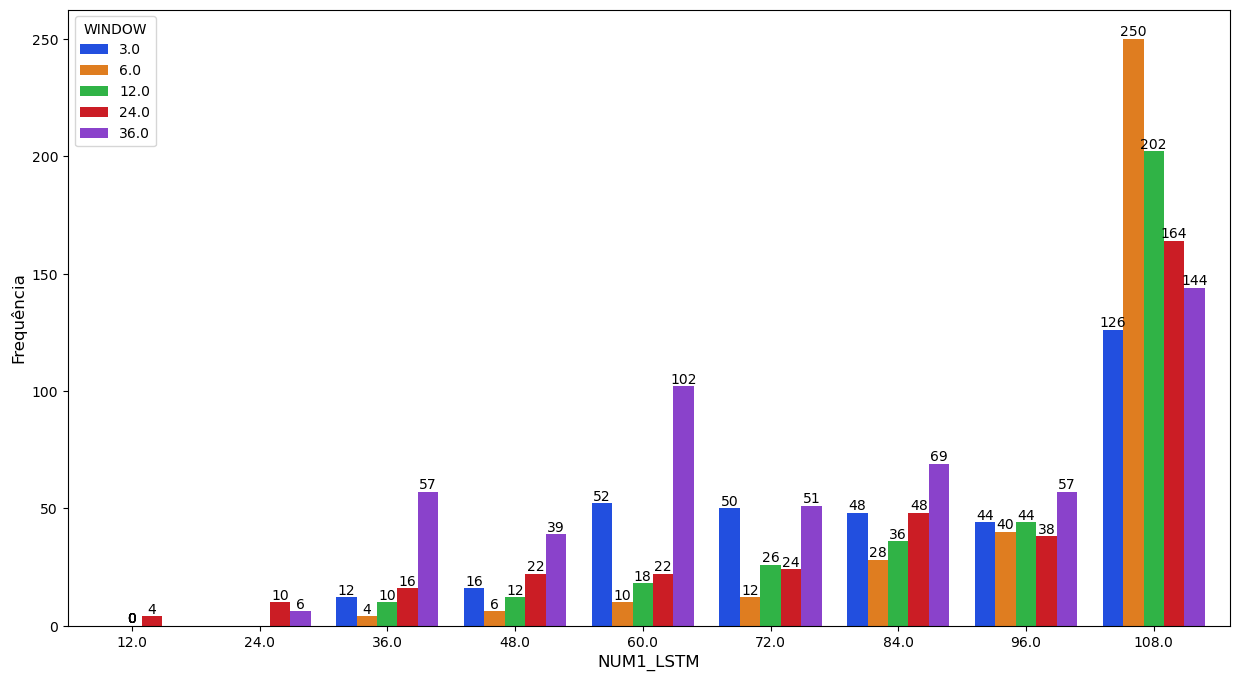

In [7]:
# Ajuste o tamanho da figura para deixar as barras maiores
plt.figure(figsize=(15, 8))

# Criando o gráfico de barras com ajuste para que as barras fiquem lado a lado
ax = sns.countplot(data=combined_df, x='NUM1_LSTM', hue='WINDOW', palette='bright', linewidth=3, dodge=True)

# Adicionando rótulos nas barras com a contagem
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Ajustando o espaçamento entre as barras
ax.set_xlim([-0.5, len(ax.patches) / len(combined_df['WINDOW'].unique())])

# Definindo os rótulos dos eixos
ax.set_xlabel('NUM1_LSTM', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Mostrando o gráfico
plt.show()

### Frequência do número de unidades na segunda camada LSTM (NUM2_LSTM)

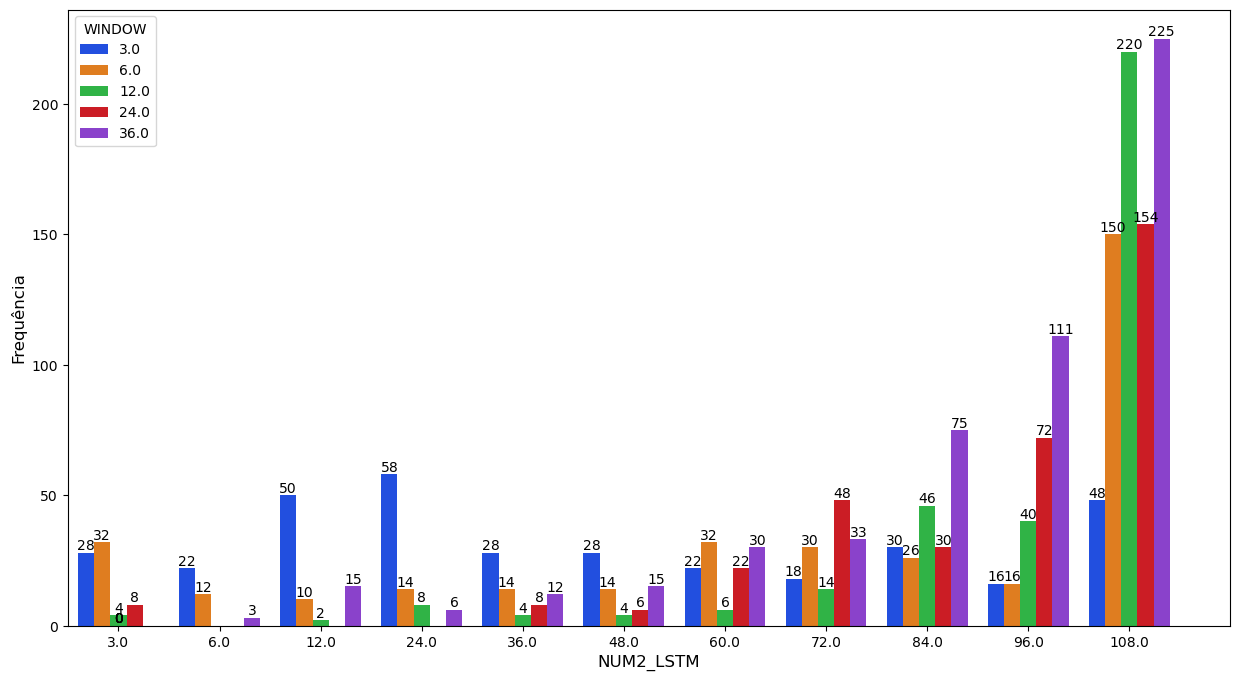

In [8]:
# Ajuste o tamanho da figura para deixar as barras maiores
plt.figure(figsize=(15, 8))

# Criando o gráfico de barras com ajuste para que as barras fiquem lado a lado
ax = sns.countplot(data=combined_df, x='NUM2_LSTM', hue='WINDOW', palette='bright', linewidth=3, dodge=True)

# Adicionando rótulos nas barras com a contagem
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Ajustando o espaçamento entre as barras
ax.set_xlim([-0.5, len(ax.patches) / len(combined_df['WINDOW'].unique())])

# Definindo os rótulos dos eixos
ax.set_xlabel('NUM2_LSTM', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Mostrando o gráfico
plt.show()

### Frequência Dropout

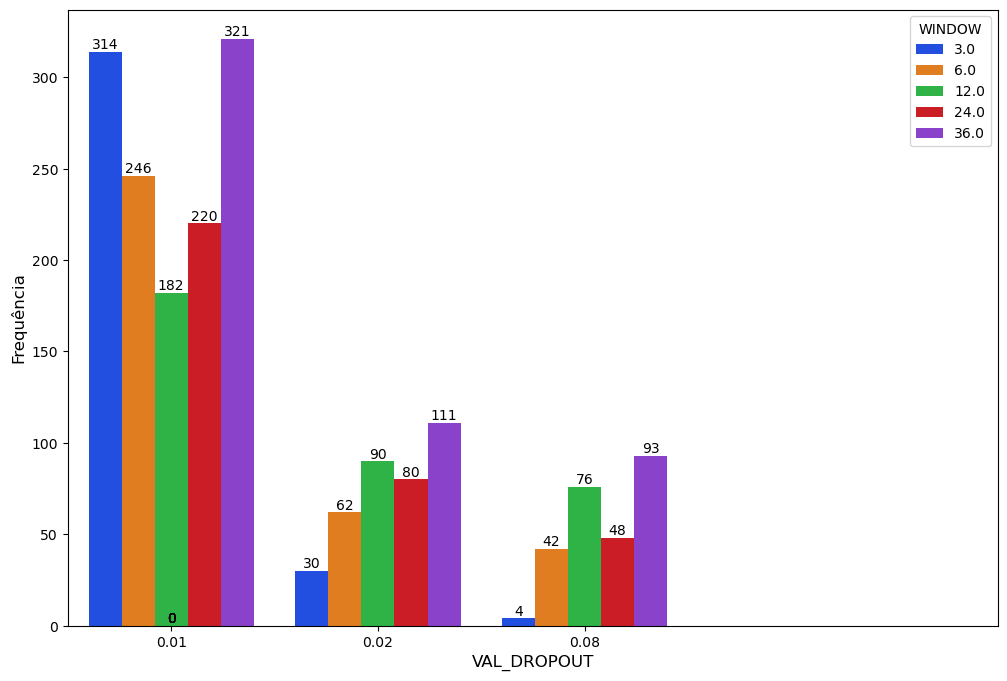

In [9]:
# Ajuste o tamanho da figura para deixar as barras maiores
plt.figure(figsize=(12, 8))

# Criando o gráfico de barras com ajuste para que as barras fiquem lado a lado
ax = sns.countplot(data=combined_df, x='VAL_DROPOUT', hue='WINDOW', palette='bright', linewidth=3, dodge=True)

# Adicionando rótulos nas barras com a contagem
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Ajustando o espaçamento entre as barras
ax.set_xlim([-0.5, len(ax.patches) / len(combined_df['WINDOW'].unique())])

# Definindo os rótulos dos eixos
ax.set_xlabel('VAL_DROPOUT', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Mostrando o gráfico
plt.show()

### Mape

/tmp/ipykernel_1000102/546114282.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='MAPE_RESCALED', hue='WINDOW', data=mape_direct, palette=palette, showfliers=False)


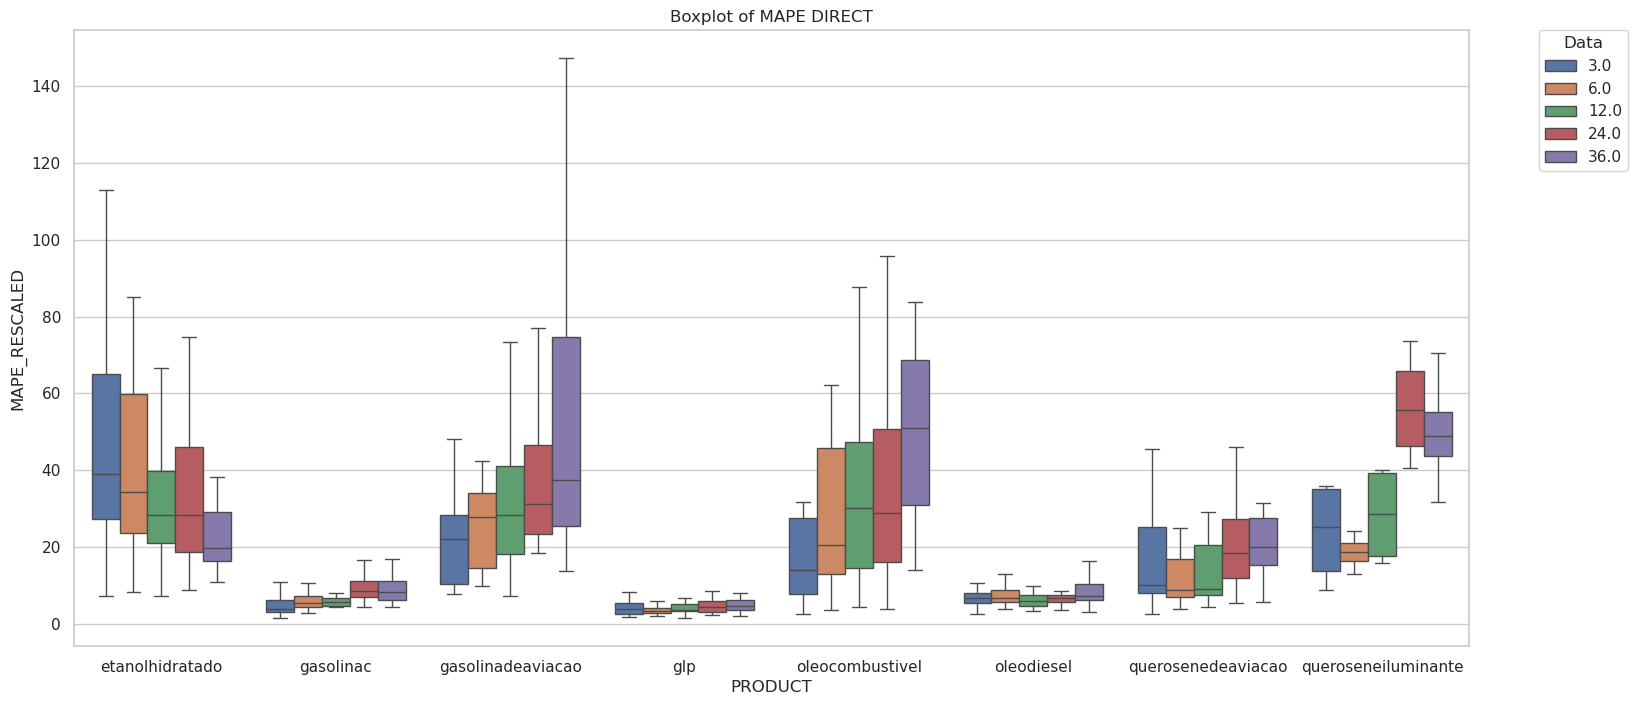

In [10]:
mape_direct = combined_df[combined_df['METHOD'] == 'DIRECT']

# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(mape_direct['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='MAPE_RESCALED', hue='WINDOW', data=mape_direct, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of MAPE DIRECT')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

/tmp/ipykernel_1000102/4267226842.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='MAPE_RESCALED', hue='WINDOW', data=mape_recursive, palette=palette, showfliers=False)


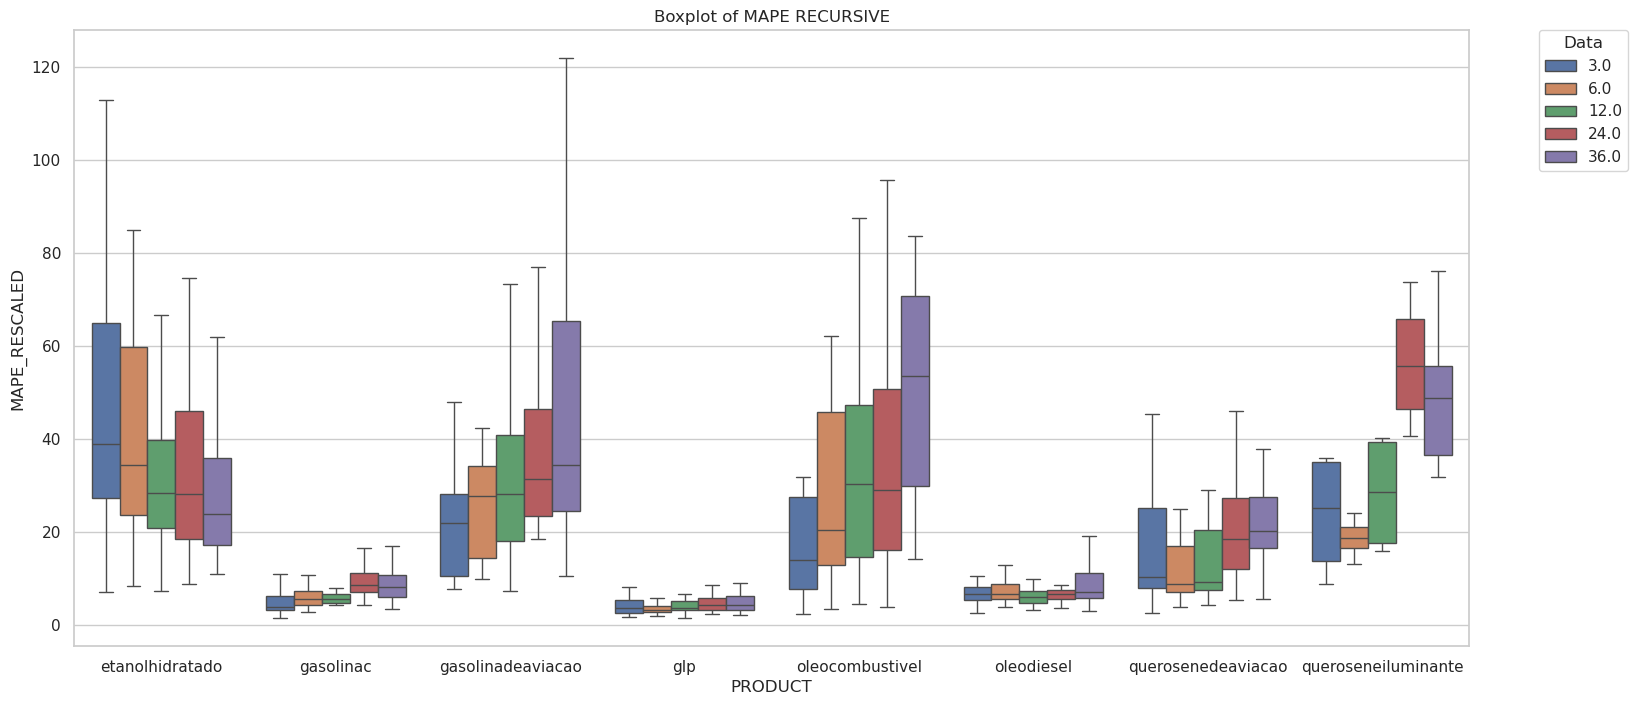

In [11]:
mape_recursive = combined_df[combined_df['METHOD'] == 'RECURSIVE']

# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(mape_recursive['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='MAPE_RESCALED', hue='WINDOW', data=mape_recursive, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of MAPE RECURSIVE')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

/tmp/ipykernel_1000102/3610243506.py:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='MAPE_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)


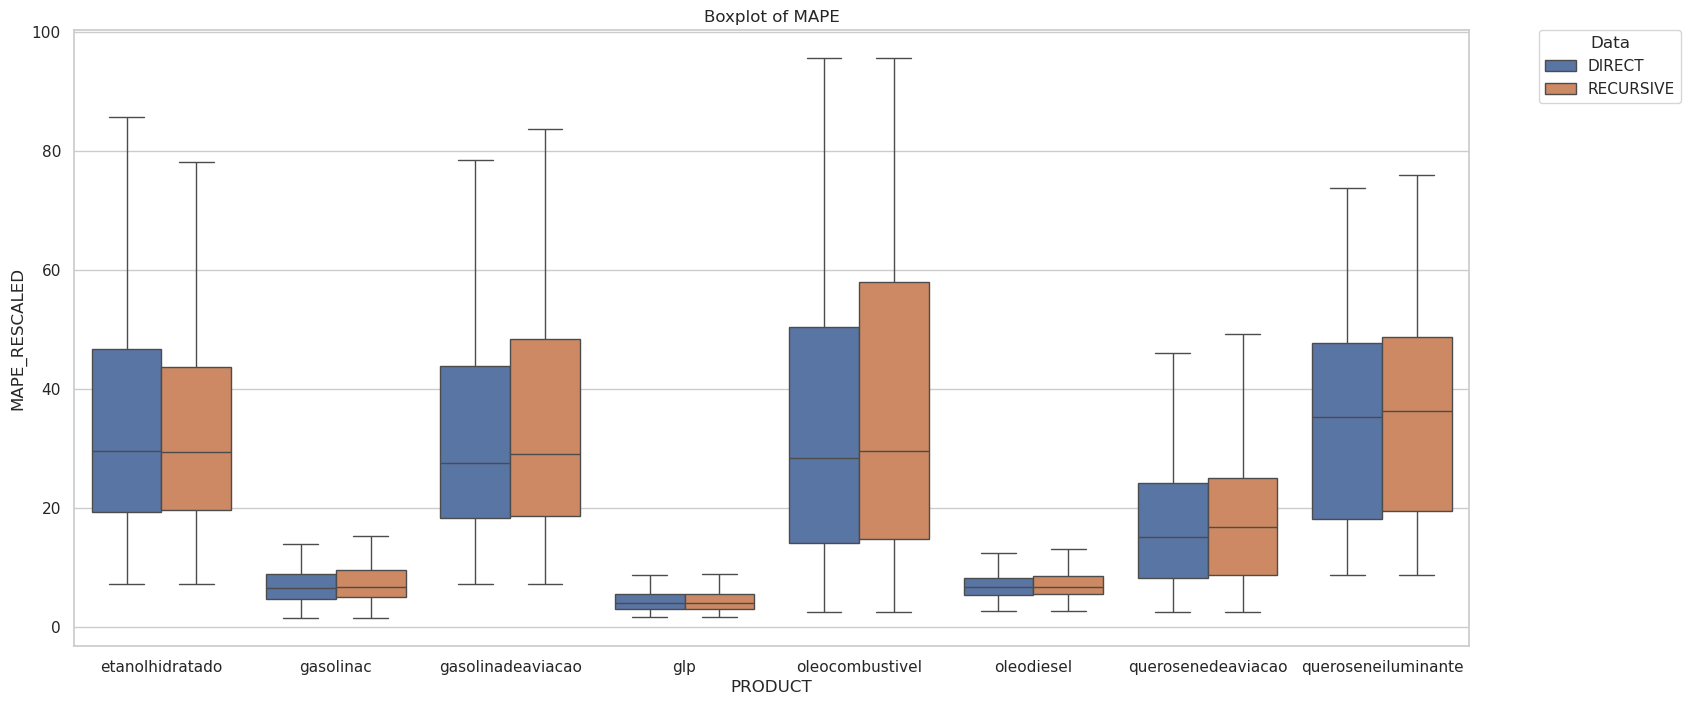

In [12]:
# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(combined_df['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='MAPE_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of MAPE')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

### PBE

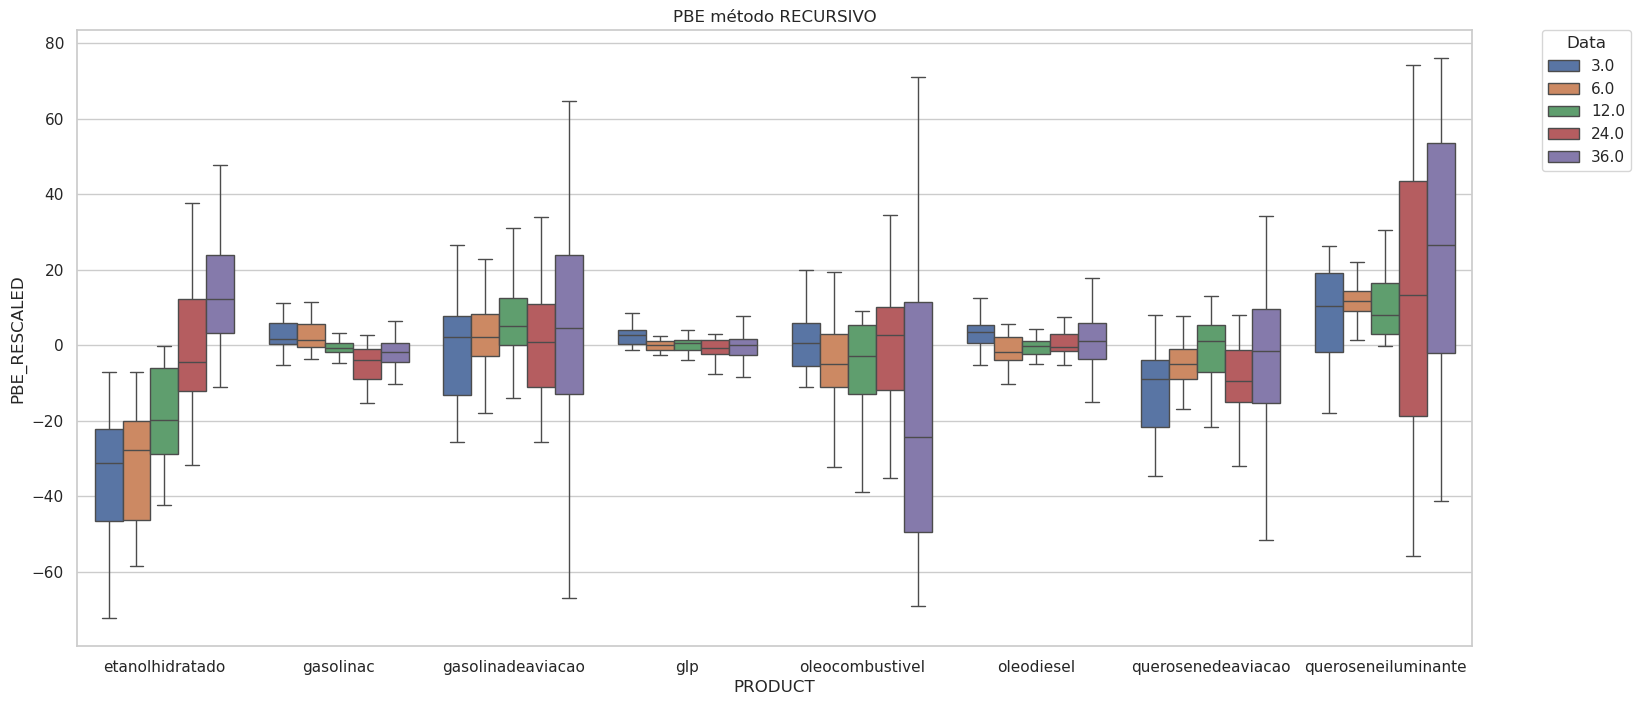

In [11]:
# filtrando pelo metodo recursivo
pbe_recursive = combined_df[combined_df['METHOD'] == 'RECURSIVE']

# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(pbe_recursive['WINDOW'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='PBE_RESCALED', hue='WINDOW', data=pbe_recursive, palette=palette, showfliers=False)
boxplot.set_title('PBE método RECURSIVO')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

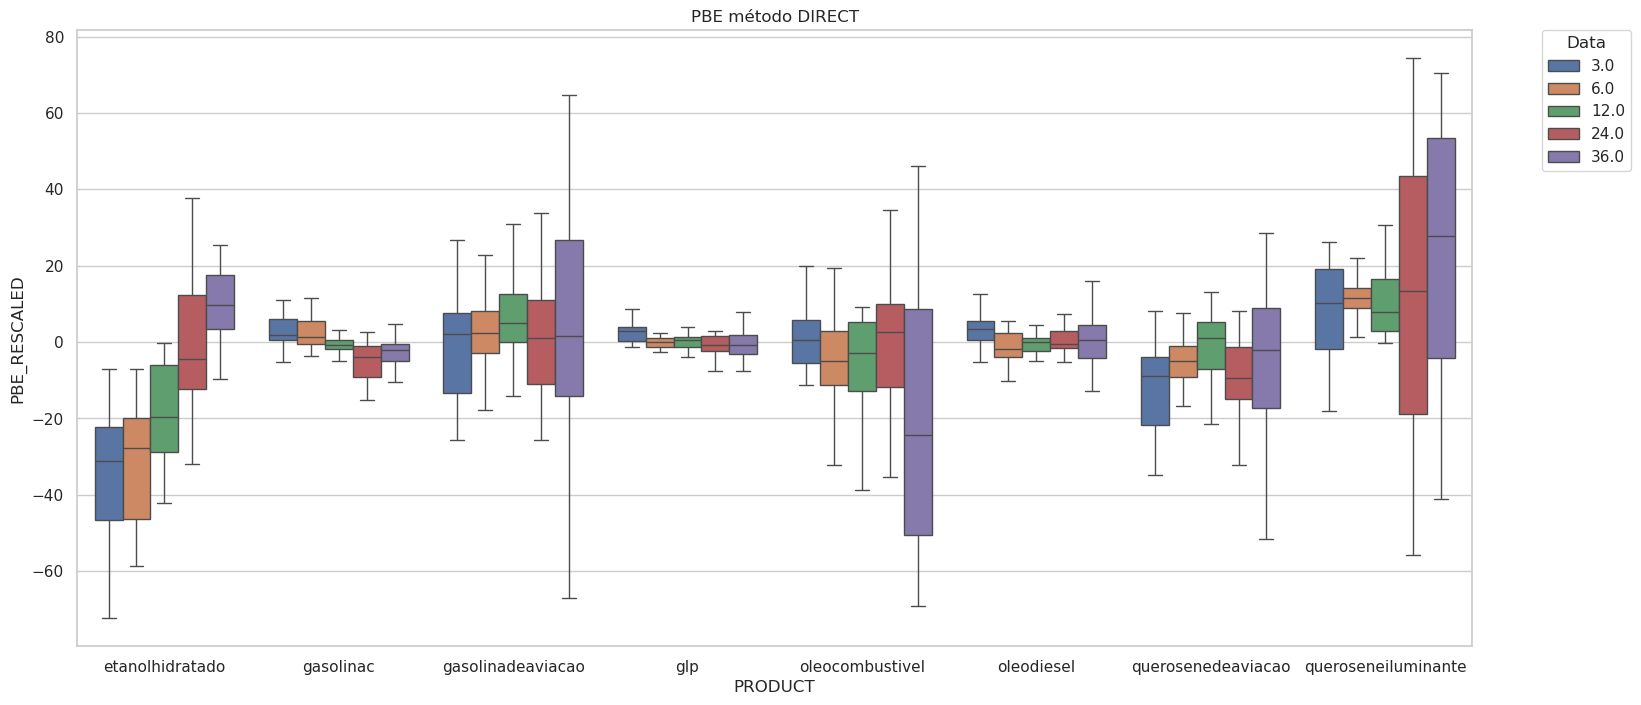

In [12]:
# filtrando pelo metodo direto
pbe_direct = combined_df[combined_df['METHOD'] == 'DIRECT']


# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(pbe_direct['WINDOW'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='PBE_RESCALED', hue='WINDOW', data=pbe_direct, palette=palette, showfliers=False)
boxplot.set_title('PBE método DIRECT')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

/tmp/ipykernel_997043/2180272491.py:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='PBE_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)


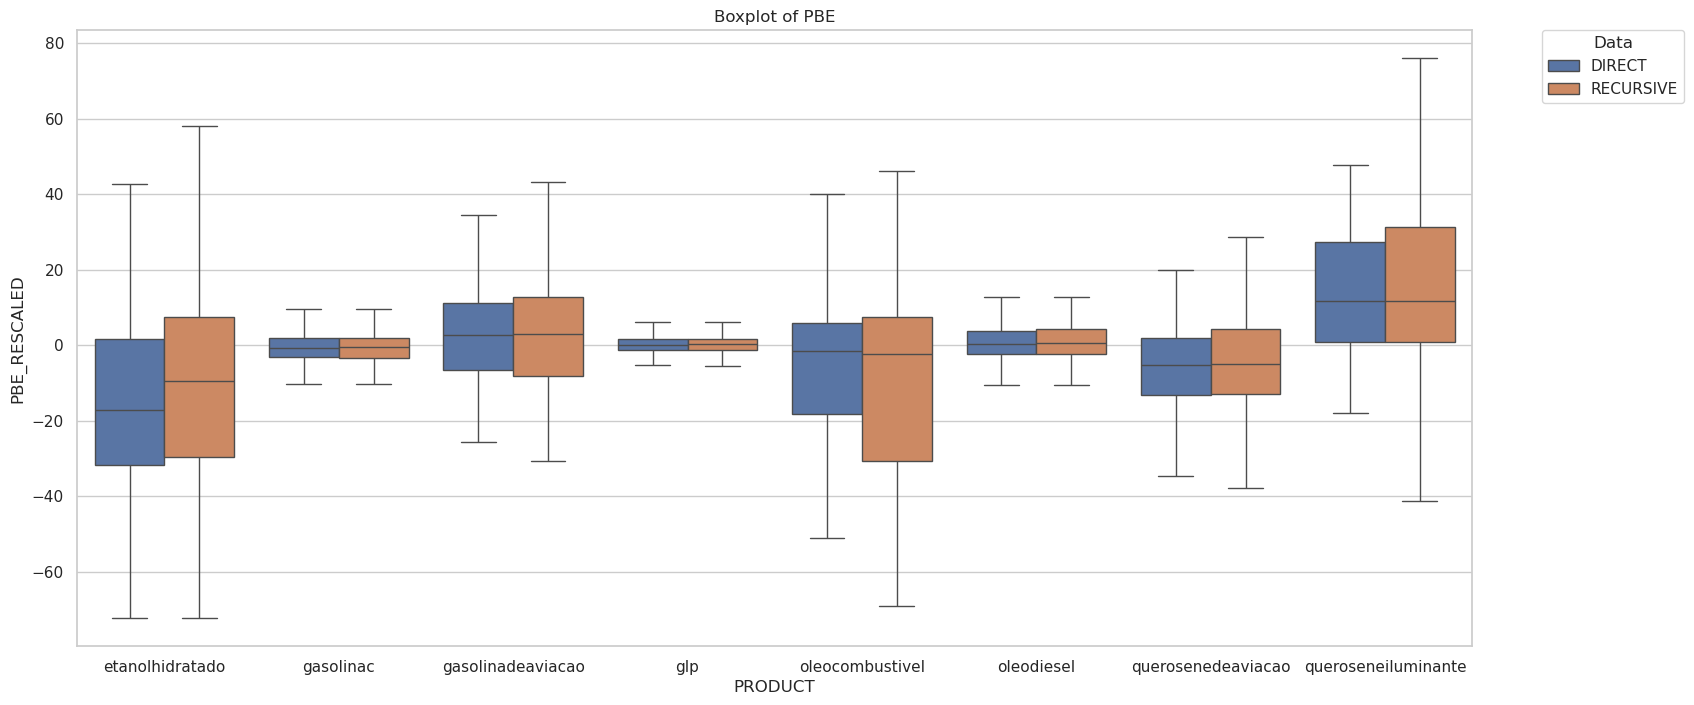

In [13]:
# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(combined_df['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='PBE_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of PBE')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

### POCID

/tmp/ipykernel_997043/2700844491.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='POCID_RESCALED', hue='WINDOW', data=pocid_direct, palette=palette, showfliers=False)


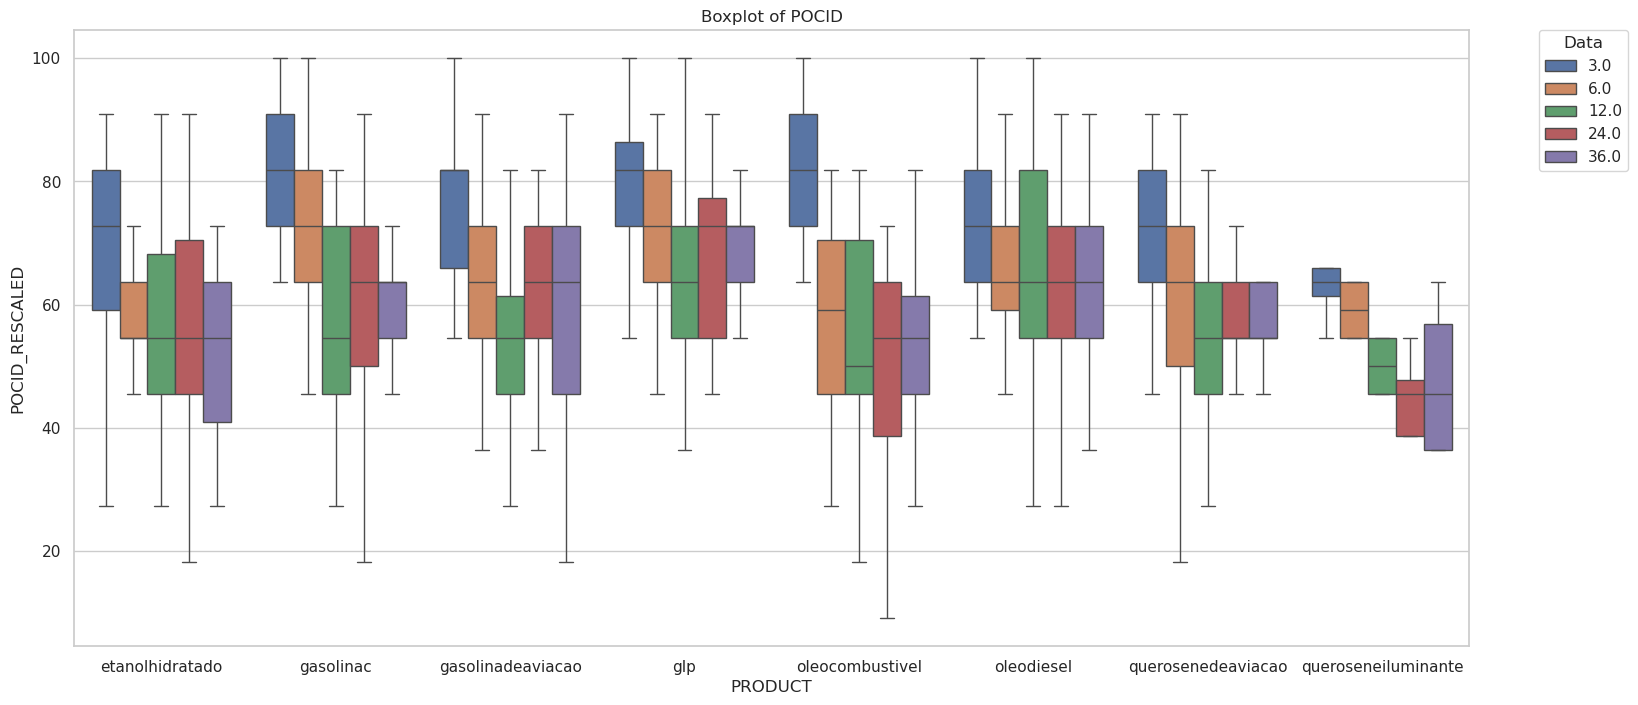

In [16]:
pocid_direct = combined_df[combined_df['METHOD'] == 'DIRECT']

# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(pocid_direct['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='POCID_RESCALED', hue='WINDOW', data=pocid_direct, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of POCID')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

/tmp/ipykernel_997043/2216815336.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='POCID_RESCALED', hue='WINDOW', data=pocid_recursive, palette=palette, showfliers=False)


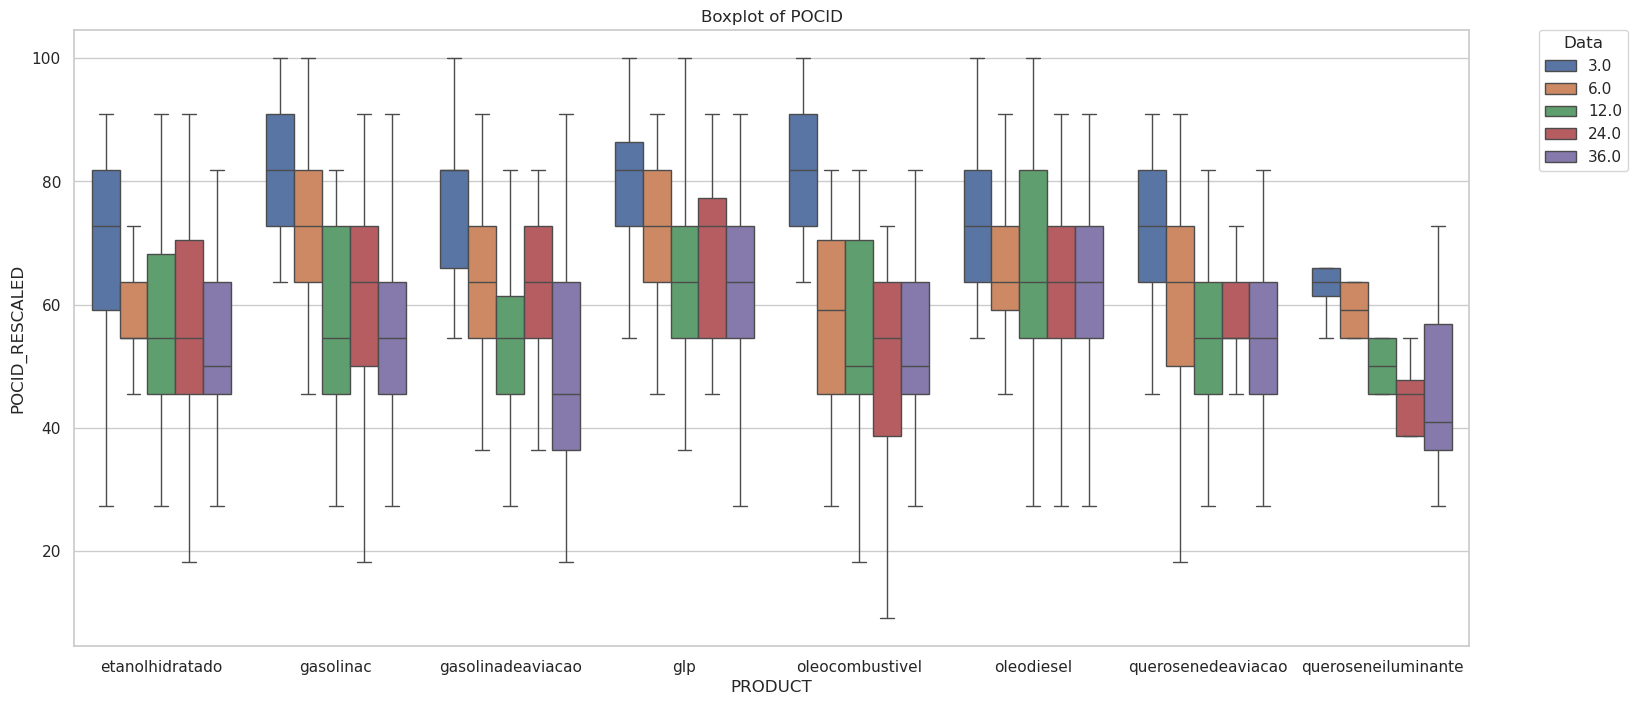

In [17]:
pocid_recursive = combined_df[combined_df['METHOD'] == 'RECURSIVE']

# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(pocid_recursive['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='POCID_RESCALED', hue='WINDOW', data=pocid_recursive, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of POCID')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

/tmp/ipykernel_1000102/1858784969.py:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='POCID_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)


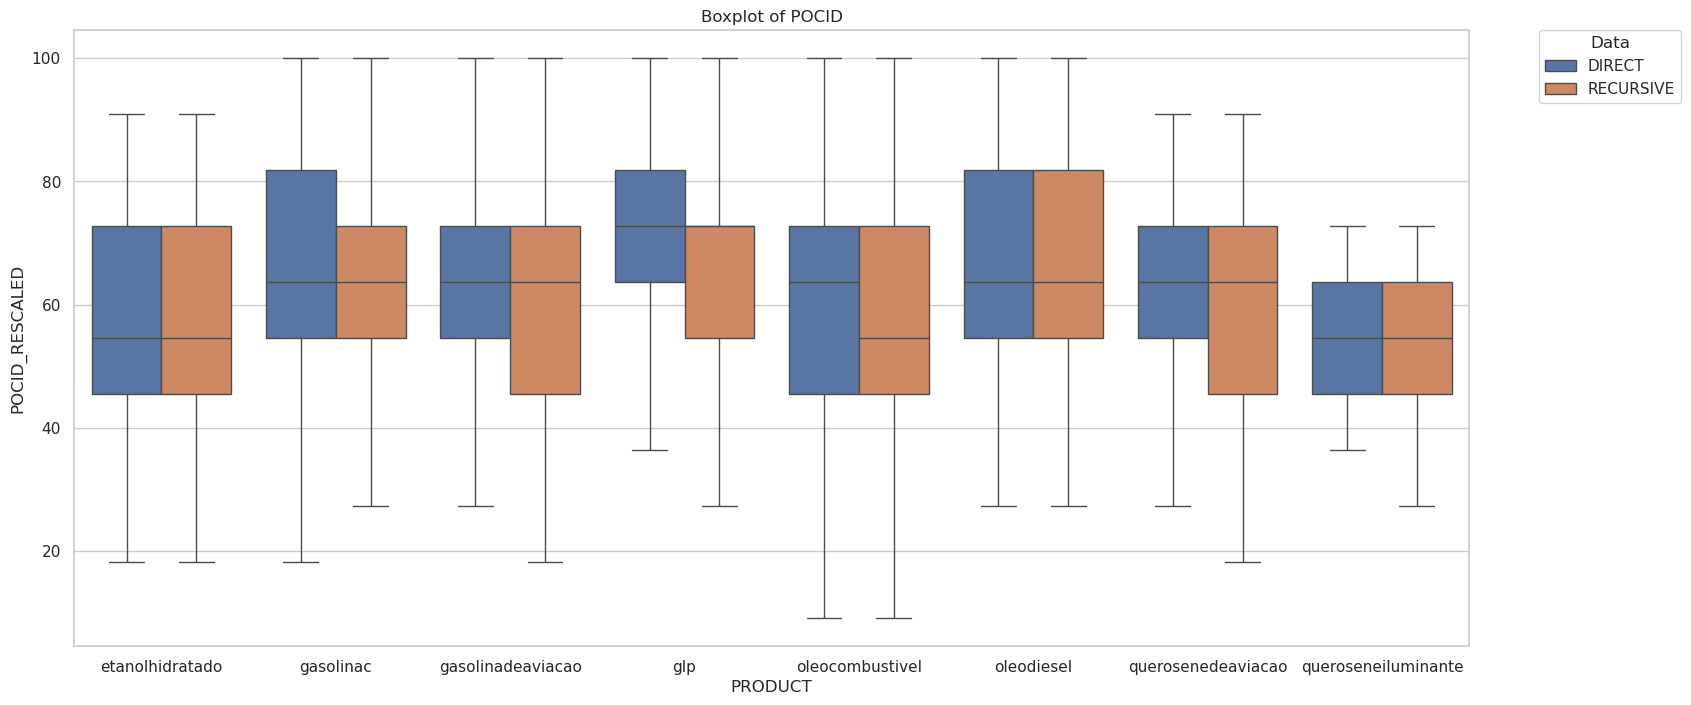

In [13]:
# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(combined_df['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='POCID_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of POCID')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

### MASE

/tmp/ipykernel_997043/1419892484.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='MASE_RESCALED', hue='WINDOW', data=mase_direct, palette=palette, showfliers=False)


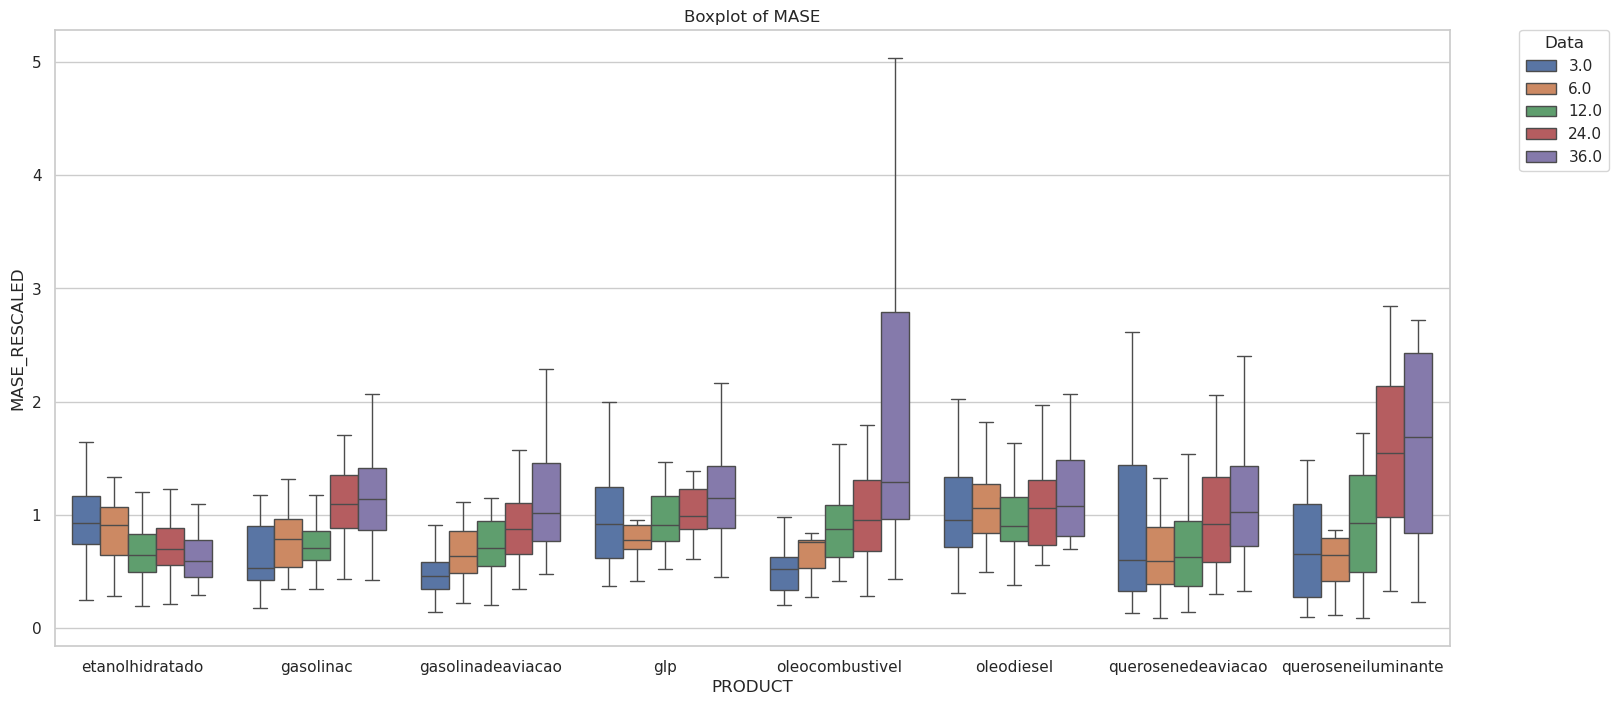

In [22]:
mase_direct = combined_df[combined_df['METHOD'] == 'DIRECT']

# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(mase_direct['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='MASE_RESCALED', hue='WINDOW', data=mase_direct, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of MASE')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

/tmp/ipykernel_997043/2973030504.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='MASE_RESCALED', hue='WINDOW', data=mase_recursive, palette=palette, showfliers=False)


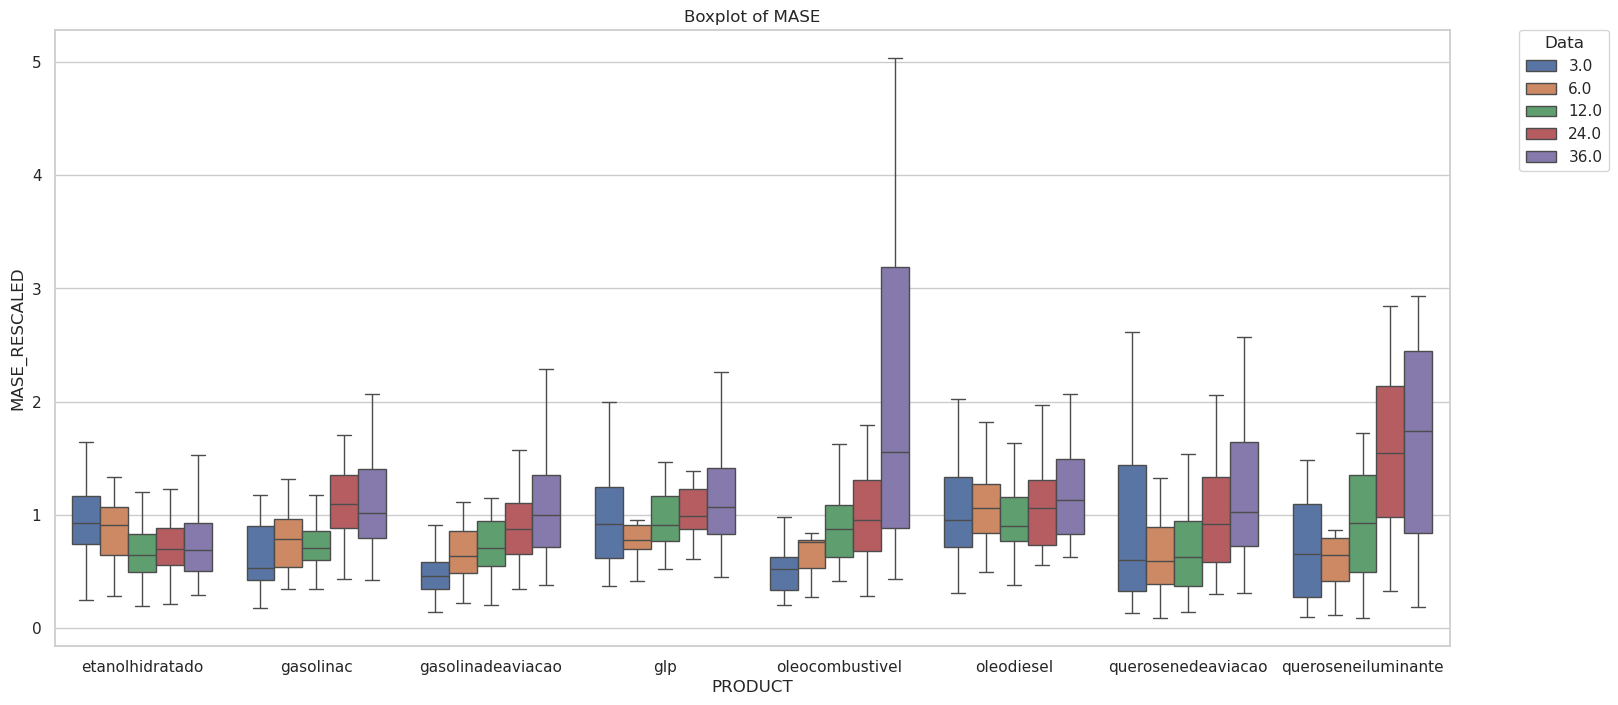

In [24]:
mase_recursive = combined_df[combined_df['METHOD'] == 'RECURSIVE']

# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(mase_recursive['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='MASE_RESCALED', hue='WINDOW', data=mase_recursive, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of MASE')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()

/tmp/ipykernel_1000102/1790479555.py:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  boxplot = sns.boxplot(x='PRODUCT', y='MASE_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)


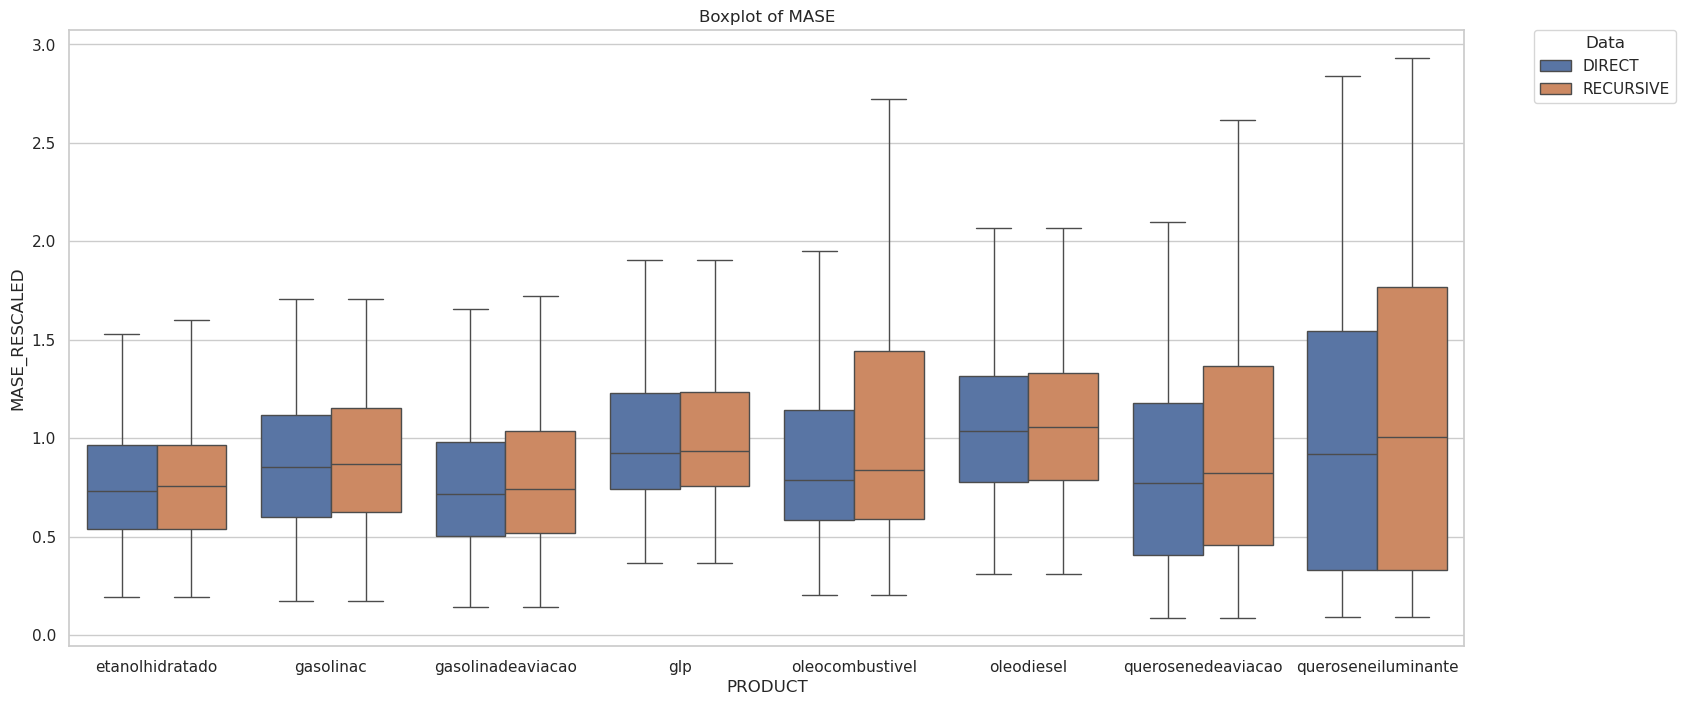

In [14]:
# Setting the aesthetics for the plot
sns.set(style="whitegrid")
 
# Creating the boxplot
plt.figure(figsize=(18, 8))
palette = sns.color_palette("deep", n_colors=len(combined_df['PRODUCT'].unique()))  # Generating a color palette
boxplot = sns.boxplot(x='PRODUCT', y='MASE_RESCALED', hue='METHOD', data=combined_df, palette=palette, showfliers=False)
boxplot.set_title('Boxplot of MASE')
# boxplot.set_xlabel('Model')
# boxplot.set_ylabel('PBE')
# plt.xticks(rotation=25)  # Rotate the product names for better visibility
# plt.ylim(-1,1)
 
# Positioning the legend on the right side, outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Data')
 
plt.show()